# Assignment 7: Due March 31st

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: (15pts) - Given that 

$$
e^{t} = \sum_{j=0}^{\infty}\frac{t^{j}}{j!}
$$

1a) 6pts - Using the Taylor series given, develop a tolerance based, recursive, vectorized program which computes the error function $erf(x)$ where

$$
erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} e^{-t^{2}}dt.
$$

1b) 6pts - Plot this function for $0\leq x \leq L_{x}$ for $L_{x}=5,6$.  How does changing your tolerance affect these plots?  Labels and legends as always for the graphs.  

1c) 3pts - Can you infer a trend as $x\rightarrow \infty$ for $erf(x)$?

In [2]:
#1a. - Function
def error_function(x, tol):
    aj = np.array(x)
    total = np.array(x)
    j = 1.
    x_squared = x**2
    while (np.max(np.abs(aj))) > tol:
        aj *= -x_squared*(2*j-1) / (j*(2*j+1))
        total += aj
        j += 1
    pi = np.pi
    return (2/np.sqrt(pi))*total

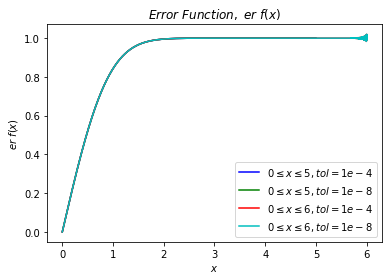

In [3]:
#1b. - Plotting
L1 = 5
L2 = 6

xvals1 = np.linspace(0, L1, int(1e5)+1)
xvals2 = np.linspace(0, L2, int(1e5)+1)

yvals1 = error_function(xvals1, 1e-4)
yvals2 = error_function(xvals1, 1e-8)

yvals3 = error_function(xvals2, 1e-4)
yvals4 = error_function(xvals2, 1e-8)

plt.plot(xvals1, yvals1, color = 'b', ls = '-', label = '$0 \leq x \leq 5, tol = 1e-4$') # 0 <= x <= 5, tol = 1e-4
plt.plot(xvals1, yvals2, color = 'g', ls = '-', label = '$0 \leq x \leq 5, tol = 1e-8$') # 0 <= x <= 5, tol = 1e-8

plt.plot(xvals2, yvals3, color = 'r', ls = '-', label = '$0 \leq x \leq 6, tol = 1e-4$') # 0 <= x <= 6 ,tol = 1e-4
plt.plot(xvals2, yvals4, color = 'c', ls = '-', label = '$0 \leq x \leq 6, tol = 1e-8$') # 0 <= x <= 6, tol = 1e-8

plt.title('$Error\ Function, \ er\ f(x)$')
plt.xlabel('$x$')
plt.ylabel('$er\ f(x)$')
plt.legend()

#There seems to be not much of a difference between the lines when I change the tolerance value

In [4]:
#1c. - Comments
# It appears that the error function is approaching 1 but never actually reaching 1
# When I graph the function on Desmos, the value that is returned is 0.999999999998

**Problem 2**: (10 pts) The Hermite polynomials $H_{n}(x)$ are such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

* (6 pts) Write a recursive program to find any Hermite polynomial $H_{n}(x)$.
* (4 pts) Generate a plot of the first six Hermite polyonmials on the interval $-2\leq x \leq 2$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot.  

In [5]:
#2. - Workspace

# When n = 0: H_{0}(x) = 1
# When n = 1: H_{1}(X) = 2x

# When n = 2: H_{2}(x) = 2x*H_{2-1}(x) - 2(2-1)*H_{2-2}(x) = 2x*H_{1}(x) - 2(1)*H_{0}(x)
                                                # H_{2}(x) = 2x*2x - 2
                                                # H_{2}(x) = 4x^2 - 2
    
# When n = 3: H_{3}(x) = 2x*H_{3-1}(x) - 2(3-1)*H_{3-2}(x) = 2x*H_{2}(x) - 2(2)*H_{1}(x)
                                                # H_{3}(x) = 2x*(4x^2 - 2) - 4*2x
                                                # H_{3}(x) = 8x^3 - 4x - 8x
                                                # H_{3}(x) = 8x^3 - 12x
        
# When n = 4: H_{4}(x) = 2x*H_{4-1}(x) - 2(4-1)*H_{4-2}(x) = 2x*H_{3}(x) - 2(3)*H_{2}(x)
                                                # H_{4}(x) = 2x*(8x^3 - 10x) - 6*(4x^2 - 2)
                                                # H_{4}(x) = 16x^4 - 20x^2 - 24x^2 - 2
                                                # H_{4}(x) = 16x^4 - 44x^2 + 12
# .
# .
# .
# . 

# When n = n: H_{n}(X) = 2x*H_{n-1}(x)-2(n-1)*H_{n-1}(x)

In [6]:
#2. - Continued (Function)
def hermite_function(x, n):
    H0 = 1.
    H1 = 2.*x
    counter = 2.
    if n == 0:
        return np.ones(x.size)
    elif n == 1:
        return 2*x
    while n >= counter:
        Hn = 2.*x*H1 - 2.*(counter-1)*H0
        H0 = H1
        H1 = Hn
        counter += 1.       
    return Hn

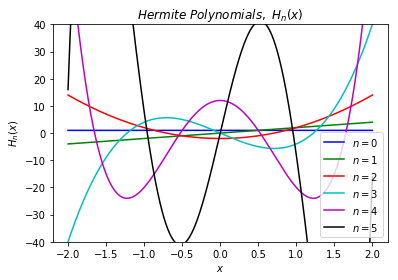

In [7]:
#2. - Continued (Plotting)
xvals = np.linspace(-2, 2, int(1e5)+1)
yvals1 = hermite_function(xvals, 0)
yvals2 = hermite_function(xvals, 1)
yvals3 = hermite_function(xvals, 2)
yvals4 = hermite_function(xvals, 3)
yvals5 = hermite_function(xvals, 4)
yvals6 = hermite_function(xvals, 5)

plt.plot(xvals, yvals1, color = 'b', ls = '-', label = '$n=0$')
plt.plot(xvals, yvals2, color = 'g', ls = '-', label = '$n=1$')
plt.plot(xvals, yvals3, color = 'r', ls = '-', label = '$n=2$')
plt.plot(xvals, yvals4, color = 'c', ls = '-', label = '$n=3$')
plt.plot(xvals, yvals5, color = 'm', ls = '-', label = '$n=4$')
plt.plot(xvals, yvals6, color = 'k', ls = '-', label = '$n=5$')

plt.title('$Hermite\ Polynomials, \ H_{n}(x)$')
plt.xlabel('$x$')
plt.ylabel('$H_{n}(x)$')
plt.ylim(-40, 40)
plt.legend()

**Problem 3:** (10 pts) Given that  

$$
F = \frac{A}{\int_0^{T_1} c(t)~dt + \int_{T_1}^{T_2} m(t) ~ dt},
$$

where $A = 5$, $T_1=\pi/4$, $T_2=\pi/2$, 

$$ c(t) = \cos(t) - sin(t) \quad \text{and}  \quad m(t) = \sin(t) - cos(t).$$

- Use Trapezoid Method to compute the denominator of the above formula and then compute $F$

- Use Simpson Method to compute the denominator of the above formula and then compute $F$

In [8]:
#3.
A = 5
T1 = np.pi/4.
T2 = np.pi/2.
N = 100

c = lambda t: np.cos(t) - np.sin(t)
m = lambda t: np.sin(t) - np.cos(t)

In [9]:
#Integral of c(t) using the trapezoid method
def trapezoid_method_of_c(a, b, N, c):
    Nint = int(N)
    tvals = np.linspace(a, b, Nint + 1)
    cvals = c(tvals)
    dx = (b - a) / N
    return dx/2.*(cvals[0] + cvals[Nint] + 2.*np.sum(cvals[1:Nint]))

print "The integral of c(t) from a = 0 to b = T1, using the trapezoid method, is: ",trapezoid_method_of_c(0, T1, N, c)

#Integral of m(t) using the trapezoid method
def trapezoid_method_of_m(a, b, N, c):
    Nint = int(N)
    tvals = np.linspace(a, b, Nint + 1)
    mvals = m(tvals)
    dx = (b - a) / N
    return dx/2.*(mvals[0] + mvals[Nint] + 2.*np.sum(mvals[1:Nint]))

print "The integral of m(t) from a = T1 to b = T2, using the trapezoid method, is: ", trapezoid_method_of_m(T1, T2, N, m)

denominator = trapezoid_method_of_c(0, T1, N, c) + trapezoid_method_of_m(T1, T2, N, m)
F = A / denominator
print "F = " + `F`

The integral of c(t) from a = 0 to b = T1, using the trapezoid method, is:  0.414211433139657
The integral of m(t) from a = T1 to b = T2, using the trapezoid method, is:  0.4142114331396569
F = 6.035564931297035


In [10]:
#Integral of c(t) using simpson's method
def simpons_method_of_c(a, b, N, c):
    N = int(2*N)
    tvals = np.linspace(a, b, N+1)
    cvals = c(tvals)
    dx = float(b-a)/float(N)
    return (dx/3.)*(cvals[0] + cvals[N]+2.*np.sum(cvals[2:N-1:2])+4.*np.sum(cvals[1:N:2]))

print "The integral of c(t) from a = 0 to b = T1, using simpson's method, is: ", simpons_method_of_c(0, T1, N, c)

#Integral of m(t) using simpson's method
def simpons_method_of_m(a, b, N, c):
    N = int(2*N)
    tvals = np.linspace(a, b, N+1)
    mvals = m(tvals)
    dx = float(b-a)/float(N)
    return (dx/3.)*(mvals[0] + mvals[N]+2.*np.sum(mvals[2:N-1:2])+4.*np.sum(mvals[1:N:2]))

print "The integral of c(t) from a = T1 to b = T, using simpson's method, is: ", simpons_method_of_c(T1, T2, N, m)

denominator = simpons_method_of_c(0, T1, N, c) + simpons_method_of_m(T1, T2, N, m)
F = A / denominator
print "F = " + `F`

The integral of c(t) from a = 0 to b = T1, using simpson's method, is:  0.4142135623736423
The integral of c(t) from a = T1 to b = T, using simpson's method, is:  0.4142135623736423
F = 6.035533905924764


**Problem 4** (5 pt) Compute a root of the function $$f(x) = x^2 - 2$$ 
- using the _secant method_ with initial guess $x_0 = 1.5$ and $x_1=1$.
- Choose a different initial guess and compute another root of the function $f(x)$.

In [11]:
#4. 
def secant_method(f, x0, x1, tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    print "A root of f(x) is: %1.15f" %x2

In [12]:
f = lambda x: (x**2.) - 2.
secant_method(f, 1.5, 1, 1e-4)

A root of f(x) is: 1.414213551646055


In [13]:
secant_method(f, 3, 2, 1e-4)

A root of f(x) is: 1.414213575081493


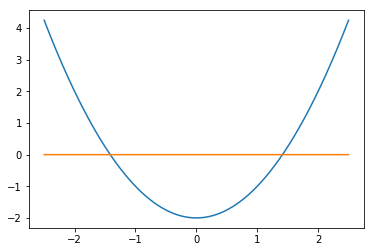

In [14]:
xvals = np.linspace(-2.5, 2.5, int(1e5) + 1)
yvals = f(xvals)
zvals = np.zeros(xvals.size)

plt.plot(xvals, yvals)
plt.plot(xvals, zvals)